## Implement of a curvature

Here we compute the transport map $\mathbf{O}_{ij}:= \mathscr{F}^T_{v \unlhd e}\mathscr{F}_{u \unlhd e}$ according to  https://arxiv.org/pdf/2206.08702.pdf and https://arxiv.org/pdf/1102.0075.pdf

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm
import pandas as pd

In [ ]:
np.where(cc > -1.021)

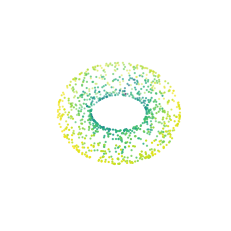

In [3]:

torus_cloud = pd.read_csv('output/torus_cloud_ratio_4_1000_2.csv', sep=',', header=None)
torus_cloud = np.array(torus_cloud)
df = pd.read_csv('output/curvature_ratio_4_1000_2.csv', sep=',', header=None)
num_eval = int(len(torus_cloud)/5)
v = df.squeeze()
# Visualize the point cloud
cc = - v
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(torus_cloud[:num_eval, 0], torus_cloud[:num_eval, 1], torus_cloud[:num_eval, 2], s=1.5, c = cc[:num_eval])
#ax.set_title("Curvature on torus point cloud")
ax.view_init(50, -70)
#plt.colorbar(scatter)
plt.axis('off')
ax.set_aspect('equal')
plt.show()
#plt.savefig('curvature_torus.png', dpi = 300)

In [76]:
d = -np.exp(np.log(v) * 2)

In [57]:
np.where(d<-1.6)

(array([1693, 2453, 2587]),)

In [82]:
d_clipped = np.clip(d, -1.3, 0)

In [130]:
tt = np.where(cc<-1.26)

In [131]:
ccc = cc
for i in range(len(tt)):
    ccc[tt[i]] = -1.02

In [122]:
np.where(cc<-1.26)

(array([ 260, 1693, 2453, 2587]),)

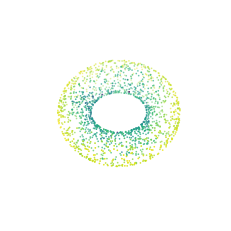

In [4]:
torus_cloud = pd.read_csv('../torus_cloud_ratio_3.csv', sep=',', header=None)
torus_cloud = np.array(torus_cloud)
df = pd.read_csv('../curvature_ratio_3.csv', sep=',', header=None)
num_eval = int(len(torus_cloud)/3)
v = df.squeeze()
# Visualize the point cloud
cc = - v
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(torus_cloud[:num_eval, 0], torus_cloud[:num_eval, 1], torus_cloud[:num_eval, 2], s=0.5, c = cc[:num_eval])
#ax.set_title("Curvature on torus point cloud")
ax.view_init(55, 0)
#plt.colorbar(scatter)
plt.axis('off')
ax.set_aspect('equal')
plt.show()
#plt.savefig('curvature_torus.png', dpi = 300)

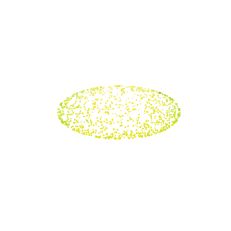

In [7]:
ellipsoid = pd.read_csv('output/ellipsoid_cloud_ratio_4.csv', sep=',', header=None)
ellipsoid = np.array(ellipsoid)
df = pd.read_csv('output/curvature_ellipsoid_ratio_4.csv', sep=',', header=None)
num_eval = int(len(ellipsoid)/5)
v = df.squeeze()
# Visualize the point cloud
cc =  - v
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(ellipsoid[:num_eval, 0], ellipsoid[:num_eval, 1], ellipsoid[:num_eval, 2], s=0.5, c = cc[:num_eval])
#ax.set_title("Curvature on torus point cloud")
ax.view_init(55, 0)
#plt.colorbar(scatter)
plt.axis('off')
ax.set_aspect('equal')
plt.show()
#plt.savefig('curvature_torus.png', dpi = 300)

In [42]:
min(cc)

-1.0836848996731259

In [76]:
np.where(cc<-1.017)[0]

array([202, 216, 250, 314, 325, 342, 479, 566, 678, 949, 971])

In [8]:
def exclude_elements_at_indices(lst, indices_to_exclude):
    # Use list comprehension to create a new list excluding elements at specified indices
    new_lst = np.array([lst[i] for i in range(len(lst)) if i not in indices_to_exclude])
    return new_lst

In [9]:
new_cloud = exclude_elements_at_indices(ellipsoid[:1000], np.where(cc<-1.017)[0])
new_color = exclude_elements_at_indices(cc, np.where(cc<-1.017)[0])

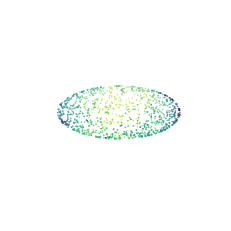

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(new_cloud[:, 0], new_cloud[:num_eval, 1], new_cloud[:num_eval, 2], s=0.5, c = new_color)
#ax.set_title("Curvature on torus point cloud")
ax.view_init(55, 0)
#plt.colorbar(scatter)
plt.axis('off')
ax.set_aspect('equal')
plt.show()

In [11]:
def ellipsoid_ground_truth(point_cloud, a, b, c):
    #point_cloud: N by 3 array
    cur = []
    for p in point_cloud:
        k = 1 / (a **2 * b**2 * c**2 * (p[0]**2 / a**4 + p[1]**2 / b**4 + p[2]**2 / c**4) **2)
        cur.append(k)
    return cur

In [15]:
dd= np.array(ellipsoid_ground_truth(new_cloud, 1, 2, 0.5))

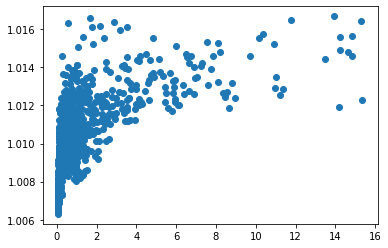

In [18]:
plt.scatter(dd, -new_color)

In [16]:
new_color 

array([ 5.20153413,  2.4702119 ,  3.53727489,  1.75339094,  0.10733122,
        0.08638319,  1.96729588,  0.09416984,  6.53772326,  3.13894498,
        7.29467982,  0.06964865,  0.11303306,  1.32734907,  0.10600698,
        0.09671111,  0.0925106 ,  0.1481392 ,  0.50188091,  0.58096532,
        1.02988101,  0.26850779,  0.07821512,  0.33348783,  0.09709328,
        0.08757199,  0.24776699,  0.31081814,  1.89734307,  0.08751192,
        0.36077121,  0.23337898,  0.25310144,  0.14509983,  6.63546225,
        0.49117509,  5.84654469,  0.57031781,  2.28846206,  0.16610135,
        0.54345117,  0.10518894,  0.65053388,  0.12965008,  0.11833731,
        5.94929162, 13.90918812,  1.04947908,  0.36906347,  0.15822878,
        0.1891589 ,  0.68139618,  0.23549815,  0.1146056 ,  0.15517383,
        1.13455087,  0.23354275,  0.29608535,  1.32451442,  0.49042142,
        0.99008958,  1.47873407,  2.48665824,  0.88163875,  0.25306664,
        7.5287758 ,  2.98035527,  0.83239905,  0.40816471,  0.16